In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [2]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_delay_high_10.xlsx',
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_delay_high_10.xlsx',
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_delay_low_10.xlsx',
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_delay_low_10.xlsx']


paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_delay_high_10.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_delay_high_10.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_delay_low_10.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_delay_low_10.xlsx']



paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_delay_high_traintarg.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_delay_low_traintarg.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay_high_traintarg.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay_low_traintarg.xlsx']

paths_distractor_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_delay_high_traintarg.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_delay_low_traintarg.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay_high_traintarg.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay_low_traintarg.xlsx']

In [3]:
df_target=[]
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    error_perf =  path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    df_x['error'] = error_perf
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    error_perf = path_save_signal.split('\\')[-1].split('.')[0].split('_')[5]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    df_x['error'] = error_perf
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)

In [4]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    error_perf =   path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    df_x['error'] = error_perf
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)

####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    error_perf = path_save_signal.split('\\')[-1].split('.')[0].split('_')[5]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    df_x['error'] = error_perf
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)

In [5]:
df = pd.concat([df_target, df_distractor])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

,times,decoding,region,subject,condition,label,item,trained,distance,error
0,0.000,-1.081787,visual,l001,1_0.2,tf,target,delay,far,high
1,2.335,-7.774941,visual,l001,1_0.2,tf,target,delay,far,high
2,4.670,-4.065262,visual,l001,1_0.2,tf,target,delay,far,high
3,7.005,5.444871,visual,l001,1_0.2,tf,target,delay,far,high
4,9.340,3.882662,visual,l001,1_0.2,tf,target,delay,far,high


In [6]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff['label']= df_shuff['item'] + ' ' + df_shuff['distance'] 
df_shuff['label'] = df_shuff['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained,distance,error
0,0.000,-1.902778,visual,d001,1_0.2,tf,target,delay,far,high
1,2.335,-1.182480,visual,d001,1_0.2,tf,target,delay,far,high
2,4.670,-0.043334,visual,d001,1_0.2,tf,target,delay,far,high
3,7.005,0.463001,visual,d001,1_0.2,tf,target,delay,far,high
4,9.340,1.317029,visual,d001,1_0.2,tf,target,delay,far,high


In [7]:
df_delay=[]
for cond in ['1_0.2', '2_0.2']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: 
                for item in ['target', 'dist']:
                    for error_beh in ['high', 'low']:
                        ####
                        if cond == '1_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                        (df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']=='delay') & 
                                     ( df['item']==item)  & (df['error']==error_beh)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']=='delay') & 
                                     ( df_shuff['item']==item)  & (df_shuff['error']==error_beh)]

                            ###
                            decoding = dfn.decoding.mean() #option1
                            #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, 'delay', dist, error_beh] )
                            #                    
                        elif cond == '2_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']=='delay') & 
                                     ( df['item']==item)  & (df['error']==error_beh)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']=='delay') & 
                                     ( df_shuff['item']==item)  & (df_shuff['error']==error_beh)]

                            ###
                            decoding = dfn.decoding.mean() #option1
                            #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std() 
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0], 
                                              item, 'delay', dist, error_beh] )
                            ##
                        ##
                    ##
                ##
            ##
        ##
    ##
##
##

df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained', 'distance', 'error_beh']


Text(0.5,1,'high error trained target')

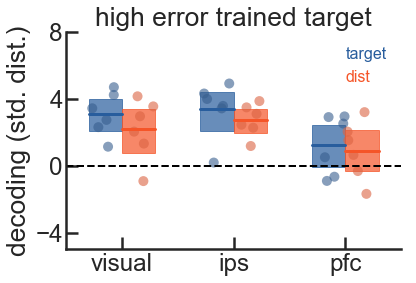

In [8]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['error_beh']=='high') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('high error trained target')

Text(0.5,1,'low error trained target')

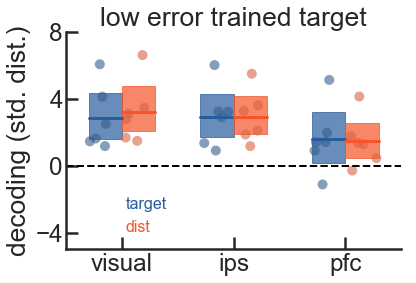

In [9]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['error_beh']=='low') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('low error trained target')

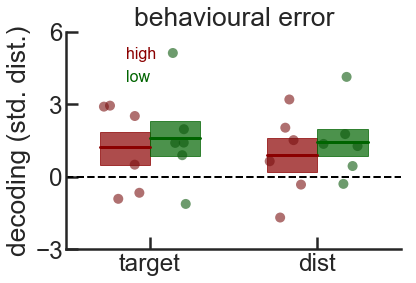

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      decoding_sh
No. Observations:        96           Method:                  REML       
No. Groups:              6            Scale:                   4.4036     
Min. group size:         16           Likelihood:              -210.8590  
Max. group size:         16           Converged:               Yes        
Mean group size:         16.0                                             
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        0.899    0.774  1.161 0.246 -0.618  2.415
item[T.target]                   0.318    0.606  0.525 0.600 -0.869  1.505
error_beh[T.low]                 0.551    0.606  0.909 0.363 -0.637  1.738
item[T.target]:error_beh[T.low] -0.152    0.

In [11]:
linares_plot(x='item', y='decoding_sh', hue='error_beh', order=['target', 'dist'], hue_order=['high', 'low'],
            df=df_delay.loc[(df_delay['region']=='pfc')], 
            palette=['darkred', 'darkgreen'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-3,6)
plt.gca().set_yticks([-3,0,3,6])
plt.title('behavioural error')
plt.show()

res_m = smf.mixedlm(formula='decoding_sh ~ item*error_beh', 
                    data=df_delay.loc[(df_delay['region']=='pfc') ],
                    groups=df_delay.loc[(df_delay['region']=='pfc') , 'subject']).fit()
print(res_m.summary())


Text(0.5,1,'coexisting trained target')

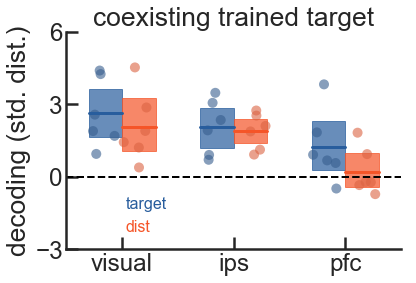

In [22]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['distance']=='far') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-3,6)
plt.gca().set_yticks([-3,0,3,6])
plt.title('coexisting trained target')

Text(0.5,1,'trained target')

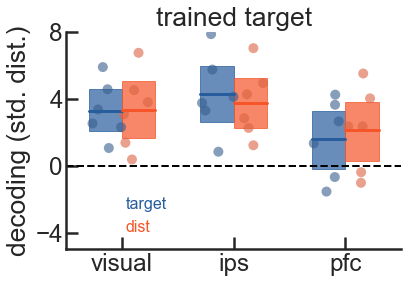

In [13]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['distance']=='close') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('trained target')

Text(0.5,1,'trained target')

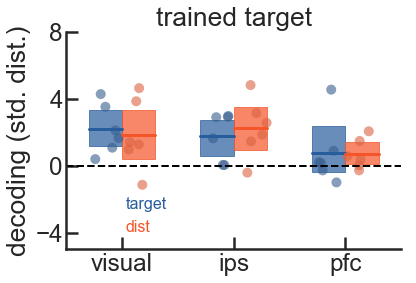

In [19]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['distance']=='far') & (df_delay['condition']=='1_0.2') ], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('trained target')

Text(0.5,1,'trained target')

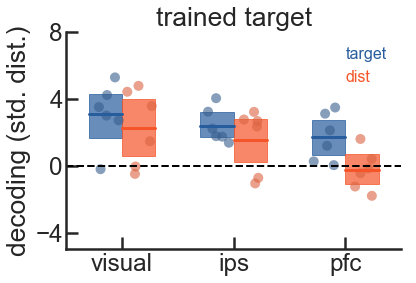

In [20]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['distance']=='far') & (df_delay['condition']=='2_0.2') ], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('trained target')